In [ ]:
import pandas as pd

In [ ]:
import json
with open("chicago_community.geojson") as f:
    cook = json.load(f)
features = cook['features']

In [ ]:
df_doses = pd.read_csv("doses_by_provider.csv")

In [ ]:
df_doses

,Provider Name,Address,City,Zip Code,Doses Administered,Lat,Long
0,3134 N CLARK OUTPATIENT CENTER,3134 N CLARK ST,CHICAGO,60657,41,41.938536,-87.650328
1,3P4CARE(IL) LLC,3502 N KEDZIE AVE,CHICAGO,60618,1008,41.944970,-87.707932
2,7 HILLS HEALTHCARE CENTER,8419 S COTTAGE GROVE AVE,CHICAGO,60619,1500,41.741481,-87.604559
3,AAYU CLINICS LAKEVIEW,1645 W SCHOOL ST,CHICAGO,60657,2383,41.941263,-87.670207
4,ABRAHAMS MARK COMPREHENSIVE WELLNESS CENTER,9500 S DORCHESTER AVE,CHICAGO,60628,34,41.721989,-87.590900
...,...,...,...,...,...,...,...
732,WEISS MEMORIAL HOSPITAL,4646 N MARINE DR,CHICAGO,60640,12344,41.966655,-87.649016
733,WEISSBLUTH PEDIATRICS - MICHIGAN,737 N MICHIGAN AVE,CHICAGO,60611,122,41.896000,-87.623806
734,WEISSBLUTH PEDIATRICS - SOUTH LOOP,1471 S MICHIGAN AVE,CHICAGO,60605,2,41.862075,-87.623838
735,WELL FUTURE PHARMACY,661 N WELLS ST,CHICAGO,60654-3616,5972,41.894522,-87.633815


In [ ]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (1,583 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../python3-numpy_

In [ ]:
import geopandas as gpd
gdf = gpd.read_file("/content/chicago_community.geojson")
gdf.set_crs(epsg=4326)

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
...,...,...,...,...,...,...,...,...,...,...
72,MOUNT GREENWOOD,0,75584290.0209,0,74,74,0,0,48665.1305392,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ..."
73,MORGAN PARK,0,91877340.6988,0,75,75,0,0,46396.419362,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ..."
74,OHARE,0,371835607.687,0,76,76,0,0,173625.98466,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,EDGEWATER,0,48449990.8397,0,77,77,0,0,31004.8309456,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ..."


In [ ]:
gdf["community"].unique()

array(['DOUGLAS', 'OAKLAND', 'FULLER PARK', 'GRAND BOULEVARD', 'KENWOOD',
       'LINCOLN SQUARE', 'WASHINGTON PARK', 'HYDE PARK', 'WOODLAWN',
       'ROGERS PARK', 'JEFFERSON PARK', 'FOREST GLEN', 'NORTH PARK',
       'ALBANY PARK', 'PORTAGE PARK', 'IRVING PARK', 'DUNNING',
       'MONTCLARE', 'BELMONT CRAGIN', 'WEST RIDGE', 'HERMOSA', 'AVONDALE',
       'LOGAN SQUARE', 'HUMBOLDT PARK', 'WEST TOWN', 'AUSTIN',
       'WEST GARFIELD PARK', 'EAST GARFIELD PARK', 'NEAR WEST SIDE',
       'NORTH LAWNDALE', 'UPTOWN', 'SOUTH LAWNDALE', 'LOWER WEST SIDE',
       'NEAR SOUTH SIDE', 'ARMOUR SQUARE', 'NORWOOD PARK',
       'NEAR NORTH SIDE', 'LOOP', 'SOUTH SHORE', 'CHATHAM', 'AVALON PARK',
       'SOUTH CHICAGO', 'BURNSIDE', 'MCKINLEY PARK', 'LAKE VIEW',
       'CALUMET HEIGHTS', 'ROSELAND', 'NORTH CENTER', 'PULLMAN',
       'SOUTH DEERING', 'EAST SIDE', 'WEST PULLMAN', 'RIVERDALE',
       'HEGEWISCH', 'GARFIELD RIDGE', 'ARCHER HEIGHTS', 'BRIGHTON PARK',
       'BRIDGEPORT', 'NEW CITY', 'WEST EL

In [ ]:
from shapely import geometry

gdf_doses = gpd.GeoDataFrame(
    df_doses, geometry=gpd.points_from_xy(df_doses.Long, df_doses.Lat))
gdf_doses.set_crs(epsg=4326)

,Provider Name,Address,City,Zip Code,Doses Administered,Lat,Long,geometry
0,3134 N CLARK OUTPATIENT CENTER,3134 N CLARK ST,CHICAGO,60657,41,41.938536,-87.650328,POINT (-87.65033 41.93854)
1,3P4CARE(IL) LLC,3502 N KEDZIE AVE,CHICAGO,60618,1008,41.944970,-87.707932,POINT (-87.70793 41.94497)
2,7 HILLS HEALTHCARE CENTER,8419 S COTTAGE GROVE AVE,CHICAGO,60619,1500,41.741481,-87.604559,POINT (-87.60456 41.74148)
3,AAYU CLINICS LAKEVIEW,1645 W SCHOOL ST,CHICAGO,60657,2383,41.941263,-87.670207,POINT (-87.67021 41.94126)
4,ABRAHAMS MARK COMPREHENSIVE WELLNESS CENTER,9500 S DORCHESTER AVE,CHICAGO,60628,34,41.721989,-87.590900,POINT (-87.59090 41.72199)
...,...,...,...,...,...,...,...,...
732,WEISS MEMORIAL HOSPITAL,4646 N MARINE DR,CHICAGO,60640,12344,41.966655,-87.649016,POINT (-87.64902 41.96665)
733,WEISSBLUTH PEDIATRICS - MICHIGAN,737 N MICHIGAN AVE,CHICAGO,60611,122,41.896000,-87.623806,POINT (-87.62381 41.89600)
734,WEISSBLUTH PEDIATRICS - SOUTH LOOP,1471 S MICHIGAN AVE,CHICAGO,60605,2,41.862075,-87.623838,POINT (-87.62384 41.86207)
735,WELL FUTURE PHARMACY,661 N WELLS ST,CHICAGO,60654-3616,5972,41.894522,-87.633815,POINT (-87.63381 41.89452)


In [ ]:
join_left_df = gdf_doses.sjoin(gdf, how="left")

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


In [ ]:
join_left_df

,Provider Name,Address,City,Zip Code,Doses Administered,Lat,Long,geometry,index_right,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len
0,3134 N CLARK OUTPATIENT CENTER,3134 N CLARK ST,CHICAGO,60657,41,41.938536,-87.650328,POINT (-87.65033 41.93854),44.0,LAKE VIEW,0,87214799.2728,0,6,6,0,0,51973.0968677
1,3P4CARE(IL) LLC,3502 N KEDZIE AVE,CHICAGO,60618,1008,41.944970,-87.707932,POINT (-87.70793 41.94497),21.0,AVONDALE,0,55290595.473,0,21,21,0,0,34261.9334038
2,7 HILLS HEALTHCARE CENTER,8419 S COTTAGE GROVE AVE,CHICAGO,60619,1500,41.741481,-87.604559,POINT (-87.60456 41.74148),39.0,CHATHAM,0,82320670.3112,0,44,44,0,0,42006.9450094
3,AAYU CLINICS LAKEVIEW,1645 W SCHOOL ST,CHICAGO,60657,2383,41.941263,-87.670207,POINT (-87.67021 41.94126),44.0,LAKE VIEW,0,87214799.2728,0,6,6,0,0,51973.0968677
4,ABRAHAMS MARK COMPREHENSIVE WELLNESS CENTER,9500 S DORCHESTER AVE,CHICAGO,60628,34,41.721989,-87.590900,POINT (-87.59090 41.72199),48.0,PULLMAN,0,59001555.602,0,50,50,0,0,35572.0695077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,WEISS MEMORIAL HOSPITAL,4646 N MARINE DR,CHICAGO,60640,12344,41.966655,-87.649016,POINT (-87.64902 41.96665),30.0,UPTOWN,0,65095642.7289,0,3,3,0,0,46972.7945549
733,WEISSBLUTH PEDIATRICS - MICHIGAN,737 N MICHIGAN AVE,CHICAGO,60611,122,41.896000,-87.623806,POINT (-87.62381 41.89600),36.0,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516
734,WEISSBLUTH PEDIATRICS - SOUTH LOOP,1471 S MICHIGAN AVE,CHICAGO,60605,2,41.862075,-87.623838,POINT (-87.62384 41.86207),33.0,NEAR SOUTH SIDE,0,49769639.4541,0,33,33,0,0,45053.1651038
735,WELL FUTURE PHARMACY,661 N WELLS ST,CHICAGO,60654-3616,5972,41.894522,-87.633815,POINT (-87.63381 41.89452),36.0,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516


In [ ]:
final_df = join_left_df[["Provider Name", "Address", "City", "Zip Code", "community", "Lat", "Long", "Doses Administered"]]
final_df.loc[:,"Doses Administered"] = final_df.loc[:, "Doses Administered"].str.replace(",", "").fillna(0).astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
final_df.to_csv("final.csv")

In [ ]:
doses_by_community = final_df.groupby("community")[["Doses Administered"]].sum()

In [ ]:
doses_by_community.to_csv("doses_by_community.csv")

In [ ]:
final_df["community"].unique()

array(['LAKE VIEW', 'AVONDALE', 'CHATHAM', 'PULLMAN', 'NEW CITY',
       'AUBURN GRESHAM', 'AUSTIN', 'GRAND BOULEVARD', 'SOUTH CHICAGO',
       'BELMONT CRAGIN', 'MCKINLEY PARK', 'SOUTH LAWNDALE',
       'GARFIELD RIDGE', 'GREATER GRAND CROSSING', 'FULLER PARK',
       'CHICAGO LAWN', 'HUMBOLDT PARK', 'BRIGHTON PARK',
       'WEST GARFIELD PARK', 'LOWER WEST SIDE', 'ROGERS PARK',
       'NORTH LAWNDALE', 'NEAR WEST SIDE', 'CLEARING', 'BEVERLY',
       'LOGAN SQUARE', 'FOREST GLEN', 'CALUMET HEIGHTS',
       'NEAR SOUTH SIDE', 'LINCOLN SQUARE', 'DOUGLAS', 'IRVING PARK',
       'OHARE', 'WEST TOWN', 'JEFFERSON PARK', 'NORWOOD PARK',
       'LINCOLN PARK', 'NORTH PARK', 'NEAR NORTH SIDE', 'LOOP',
       'WEST RIDGE', 'HEGEWISCH', 'BRIDGEPORT', 'ENGLEWOOD', 'WEST LAWN',
       'PORTAGE PARK', 'EAST SIDE', 'ROSELAND', 'EDGEWATER', 'ASHBURN',
       'DUNNING', 'WASHINGTON HEIGHTS', 'UPTOWN', 'HYDE PARK',
       'ALBANY PARK', 'KENWOOD', 'ARCHER HEIGHTS', nan, 'NORTH CENTER',
       'MORGAN P

In [ ]:
join_left_df

,Provider Name,Address,City,Zip Code,Doses Administered,Lat,Long,geometry,index_right,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len
0,3134 N CLARK OUTPATIENT CENTER,3134 N CLARK ST,CHICAGO,60657,41,41.938536,-87.650328,POINT (-87.65033 41.93854),44.0,LAKE VIEW,0,87214799.2728,0,6,6,0,0,51973.0968677
1,3P4CARE(IL) LLC,3502 N KEDZIE AVE,CHICAGO,60618,1008,41.944970,-87.707932,POINT (-87.70793 41.94497),21.0,AVONDALE,0,55290595.473,0,21,21,0,0,34261.9334038
2,7 HILLS HEALTHCARE CENTER,8419 S COTTAGE GROVE AVE,CHICAGO,60619,1500,41.741481,-87.604559,POINT (-87.60456 41.74148),39.0,CHATHAM,0,82320670.3112,0,44,44,0,0,42006.9450094
3,AAYU CLINICS LAKEVIEW,1645 W SCHOOL ST,CHICAGO,60657,2383,41.941263,-87.670207,POINT (-87.67021 41.94126),44.0,LAKE VIEW,0,87214799.2728,0,6,6,0,0,51973.0968677
4,ABRAHAMS MARK COMPREHENSIVE WELLNESS CENTER,9500 S DORCHESTER AVE,CHICAGO,60628,34,41.721989,-87.590900,POINT (-87.59090 41.72199),48.0,PULLMAN,0,59001555.602,0,50,50,0,0,35572.0695077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,WEISS MEMORIAL HOSPITAL,4646 N MARINE DR,CHICAGO,60640,12344,41.966655,-87.649016,POINT (-87.64902 41.96665),30.0,UPTOWN,0,65095642.7289,0,3,3,0,0,46972.7945549
733,WEISSBLUTH PEDIATRICS - MICHIGAN,737 N MICHIGAN AVE,CHICAGO,60611,122,41.896000,-87.623806,POINT (-87.62381 41.89600),36.0,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516
734,WEISSBLUTH PEDIATRICS - SOUTH LOOP,1471 S MICHIGAN AVE,CHICAGO,60605,2,41.862075,-87.623838,POINT (-87.62384 41.86207),33.0,NEAR SOUTH SIDE,0,49769639.4541,0,33,33,0,0,45053.1651038
735,WELL FUTURE PHARMACY,661 N WELLS ST,CHICAGO,60654-3616,5972,41.894522,-87.633815,POINT (-87.63381 41.89452),36.0,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516


In [ ]:
gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]

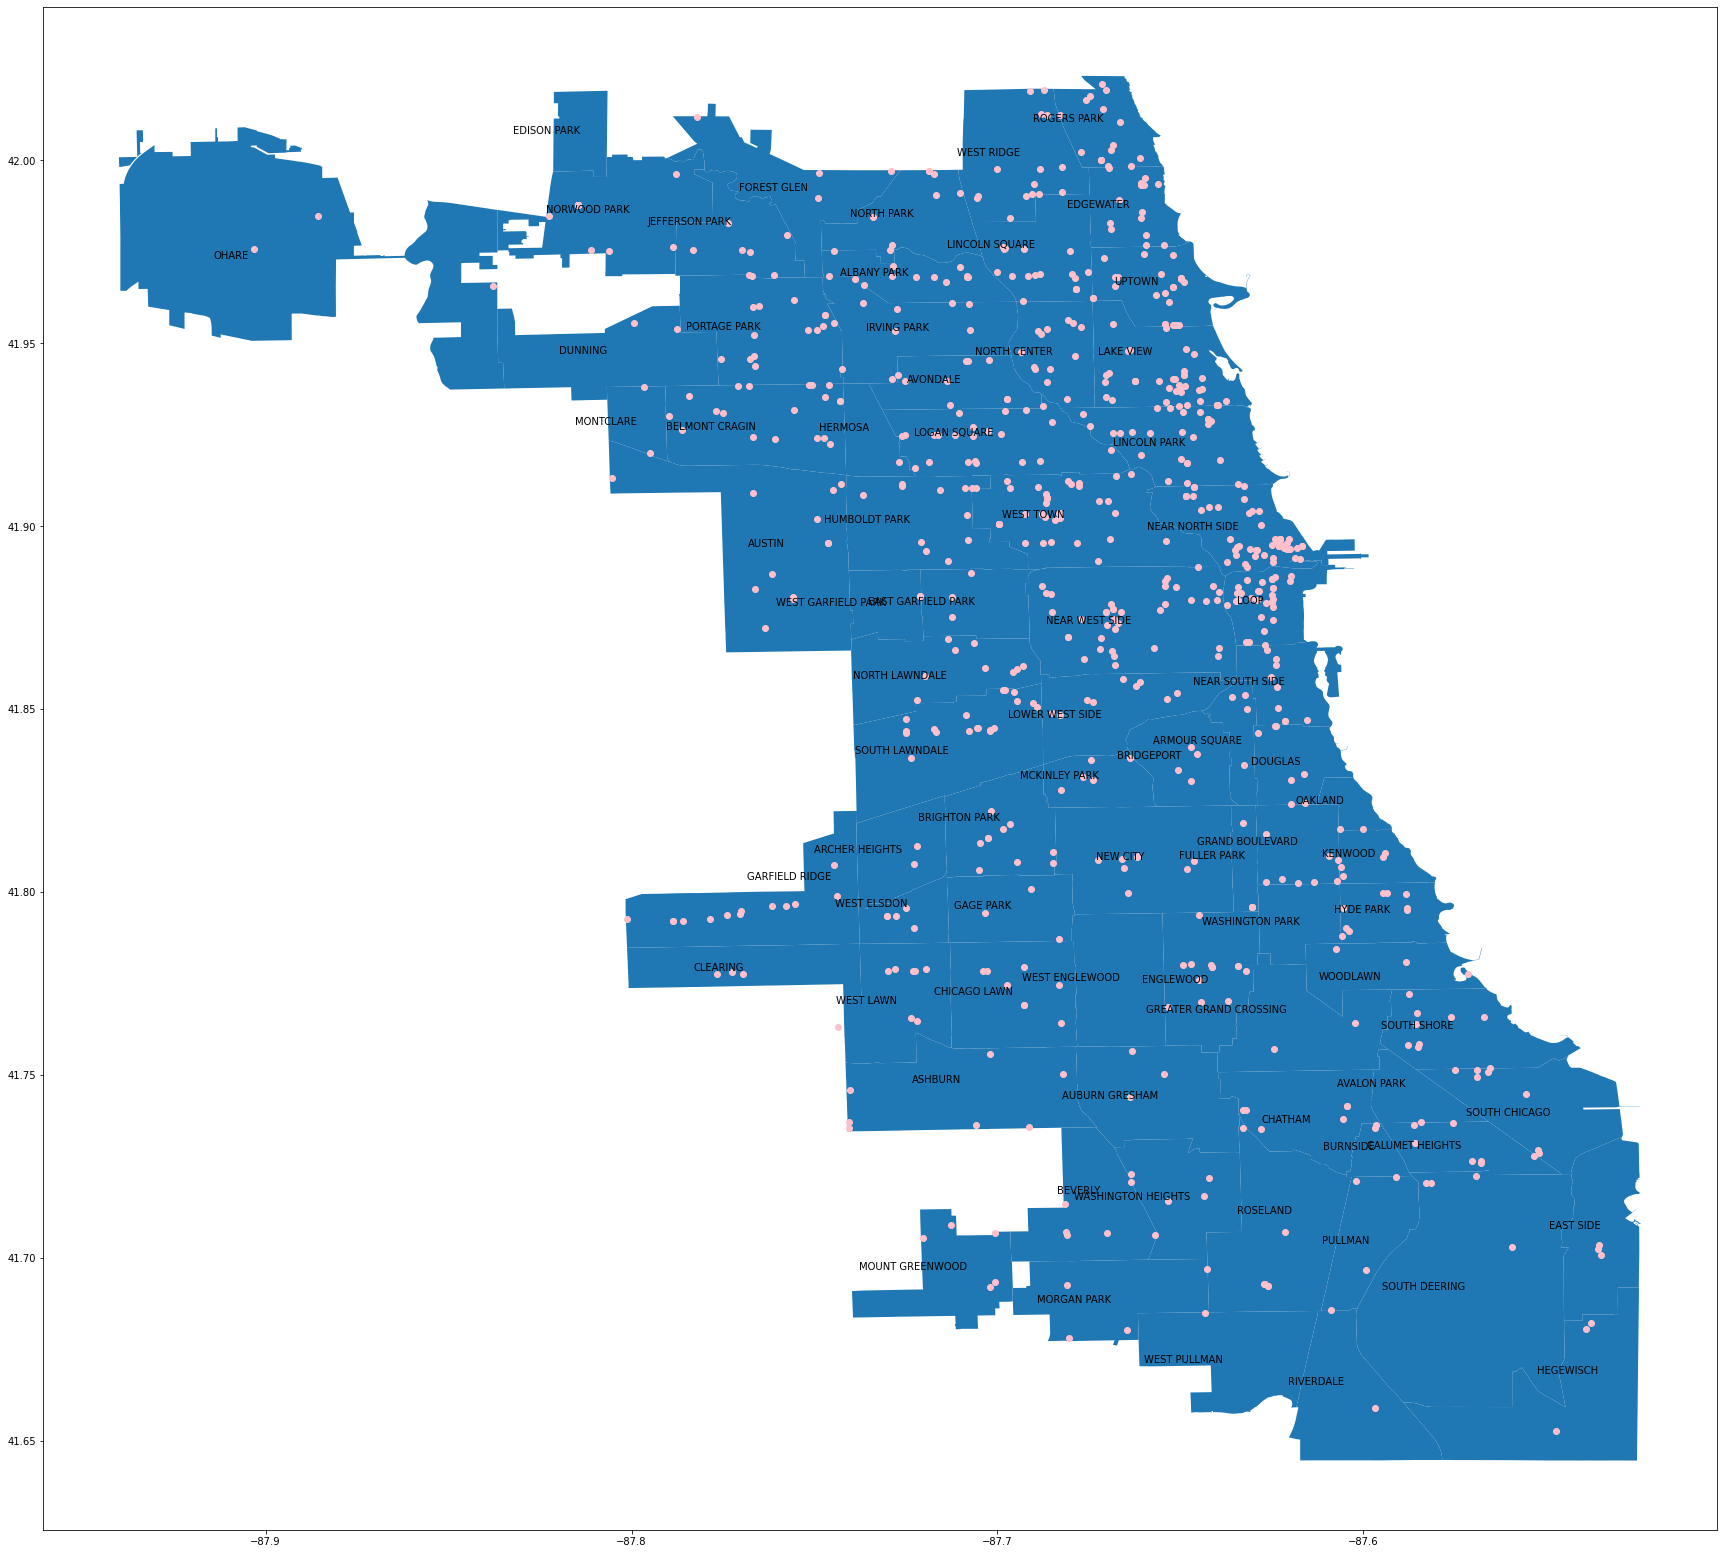

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
gdf.plot(ax=ax)
gdf_doses.plot(ax=ax, alpha=1, color="pink")

for idx, row in gdf.iterrows():
    plt.annotate(s=row['community'], xy=row['coords'],
                 horizontalalignment='right',
                 fontsize=10)